In [1]:
%matplotlib widget
import starepandas
import pystare
import shapely
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


In [2]:
germany =  [4251398048237748227, 4269412446747230211,
            4278419646001971203, 4539628424389459971,
            4548635623644200963, 4566650022153682947]

cities =   {'name': ['berlin', 'madrid'],
            'sid': [4258121269174388239, 4288120002905386575]}


In [6]:
cities.add_trixels(inplace=True)


AttributeError: 'list' object has no attribute 'add_trixels'

In [3]:
cities = starepandas.STAREDataFrame(cities, sids='sid')
cities.stare_intersects(germany)

0     True
1    False
dtype: bool

<AxesSubplot:>

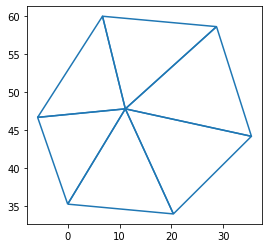

In [8]:
starepandas.STAREDataFrame(sids=[germany]).add_trixels().plot()

In [4]:
lat = [53.75702912049104, 54.98310415304803, 53.69393219666267, 
       50.128051662794235, 49.01778351500333, 47.62058197691181, 
       47.467645575544, 50.266337795607285, 51.10667409932158, 53.75702912049104]
lon = [14.119686313542559, 9.921906365609118, 7.100424838905269, 
       6.043073357781111, 8.099278598674744, 7.466759067422231, 
       12.932626987365948, 12.240111118222558, 15.01699588385867, 14.119686313542559]
sids = pystare.cover_from_ring(lat, lon, 7)

In [39]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,KOS,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [81]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
n_america = world[world.continent=='North America'].reset_index()
n_america = starepandas.STAREDataFrame(n_america)
n_america = n_america.set_sids(n_america.make_sids(level=9))

In [87]:
santa_barbara_sid = pystare.from_lonlat([-119.81100397568609], [34.44687326105255], level=5)

In [88]:
n_america

,index,pop_est,continent,name,iso_a3,gdp_md_est,geometry,sids
0,3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...","[3028670749406658567, 3028705933778747401, 302..."
1,4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...","[1171498853069750281, 1171501052093005833, 117..."
2,16,11263077.0,North America,Haiti,HTI,14332,"POLYGON ((-71.71236 19.71446, -71.62487 19.169...","[3100869080932941831, 3100915260421308425, 310..."
3,17,10738958.0,North America,Dominican Rep.,DOM,88941,"POLYGON ((-71.70830 18.04500, -71.68774 18.316...","[2506264187747958793, 2506266386771214345, 250..."
4,19,389482.0,North America,Bahamas,BHS,13578,"MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ...","[3126096275720634377, 3126098474743889929, 312..."
5,22,56225.0,North America,Greenland,GRL,3051,"POLYGON ((-46.76379 82.62796, -43.40644 83.225...","[3614138700964823047, 3614173885336911881, 361..."
6,27,127575529.0,North America,Mexico,MEX,1268870,"POLYGON ((-117.12776 32.53534, -115.99135 32.6...","[3397965918851039239, 3398018695409172489, 339..."
7,33,4246439.0,North America,Panama,PAN,66800,"POLYGON ((-77.35336 8.67050, -77.47472 8.52429...","[2918490888210481161, 2918495286256992265, 291..."
8,34,5047561.0,North America,Costa Rica,CRI,61801,"POLYGON ((-82.54620 9.56613, -82.93289 9.47681...","[3391782265456427017, 3391786663502938121, 339..."
9,35,6545502.0,North America,Nicaragua,NIC,12520,"POLYGON ((-83.65561 10.93876, -83.89505 10.726...","[3389556853921808393, 3389561251968319497, 338..."


In [93]:
n_america[n_america.stare_intersects(santa_barbara_sid)].name

1    United States of America
Name: name, dtype: object

<AxesSubplot:>

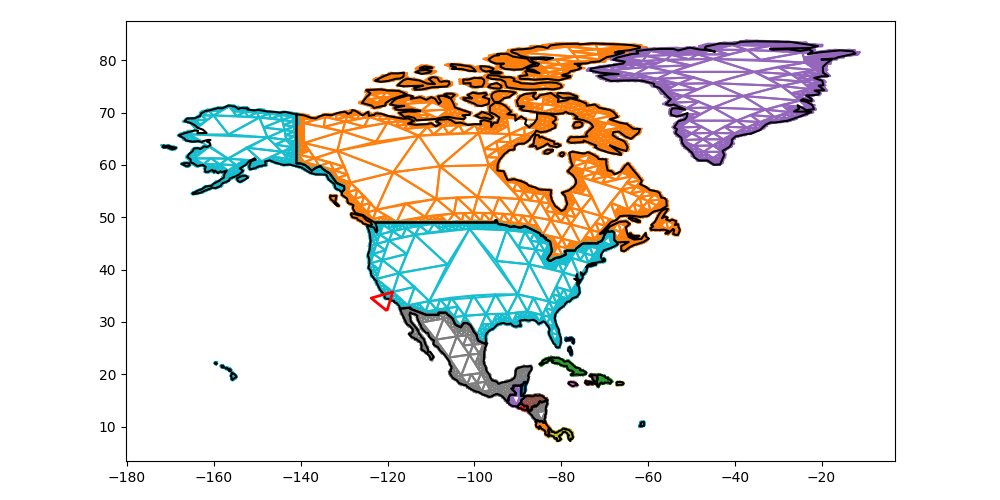

In [96]:
fig = plt.figure(figsize=(10, 5), dpi=100)
ax = fig.add_subplot()
fig.tight_layout()

n_america.add_trixels().plot(ax=ax, column='name')
n_america.boundary.plot(ax=ax, color='black')
starepandas.STAREDataFrame(sids=santa_barbara_sid).add_trixels().plot(color='red', ax=ax, linewidth=2)